In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
dataset=pd.read_csv('studentInfo.csv')
X=dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y=dataset.iloc[:,8].values


In [3]:
dataset.isnull().sum()

code_module             0
gender                  0
region                  0
highest_education       0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,7]=le.fit_transform(X[:,7])
Y=le.fit_transform(Y)

In [5]:
onehotencoder=OneHotEncoder(categorical_features=[0,2,3,4])
X=onehotencoder.fit_transform(X).toarray()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, test_size=0.30, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.fit_transform(Xtest)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier_lr=LogisticRegression(random_state=0)
classifier_lr.fit(Xtrain, Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
Ypred_lr=classifier_lr.predict(Xtest)

In [10]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(Ytest,Ypred_lr)

In [11]:
from sklearn.model_selection import cross_val_score
accuracies_lr=cross_val_score(estimator = classifier_lr, X=Xtrain, y=Ytrain, cv= 10, n_jobs=-1) 
lr_accuracy=accuracies_lr.mean()*100
lr_var=accuracies_lr.std()*100

In [12]:
from sklearn.svm import SVC
classifier_svm=SVC(kernel='rbf' , random_state=0)
classifier_svm.fit(Xtrain, Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
Ypred_svm=classifier_svm.predict(Xtest)

In [14]:
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(Ytest,Ypred_svm)


In [15]:
from sklearn.model_selection import cross_val_score
accuracies_svm=cross_val_score(estimator = classifier_svm, X=Xtrain, y=Ytrain, cv= 10, n_jobs=-1) 
svm_accuracy=accuracies_svm.mean()*100
svm_var=accuracies_svm.std()*100


In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=1000, metric ='minkowski' ,p = 2)
classifier_knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1000, p=2,
                     weights='uniform')

In [17]:
Ypred_knn=classifier_knn.predict(Xtest)


In [18]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(Ytest,Ypred_knn)

In [19]:
from sklearn.model_selection import cross_val_score
accuracies_knn=cross_val_score(estimator = classifier_knn, X=Xtrain, y=Ytrain, cv= 10, n_jobs=-1) 
knn_accuracy=accuracies_knn.mean()*100
knn_var=accuracies_knn.std()*100


In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(Xtrain, Ytrain)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [21]:
Ypred_dt=classifier_dt.predict(Xtest)

In [22]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(Ytest,Ypred_dt)


In [23]:
from sklearn.model_selection import cross_val_score
accuracies_dt=cross_val_score(estimator = classifier_dt, X=Xtrain, y=Ytrain, cv= 10) 
dt_accuracy=accuracies_dt.mean()*100
dt_var=accuracies_dt.std()*100

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators=500,  criterion='entropy', random_state=0, n_jobs=-1)
classifier_rf.fit(Xtrain, Ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
Ypred_rf=classifier_rf.predict(Xtest)


In [26]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(Ytest,Ypred_rf)

In [27]:
from sklearn.model_selection import cross_val_score
accuracies_rf=cross_val_score(estimator = classifier_rf, X=Xtrain, y=Ytrain, cv= 10, n_jobs=-1) 
rf_accuracy=accuracies_rf.mean()*100
rf_var=accuracies_rf.std()*100

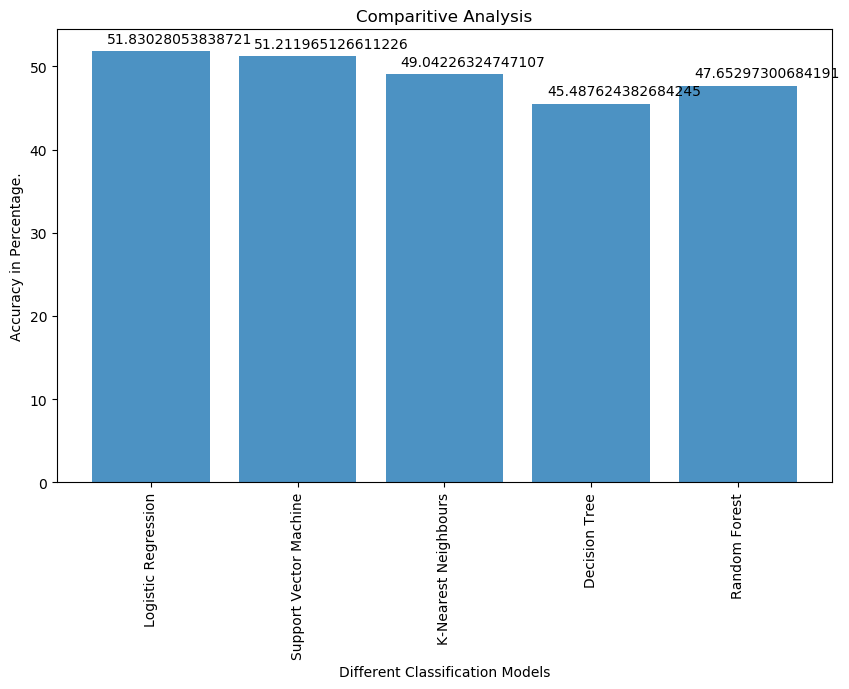

In [43]:
objects = ('Logistic Regression','Support Vector Machine', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
performance = [lr_accuracy,svm_accuracy,knn_accuracy,dt_accuracy,rf_accuracy]
labels=[lr_accuracy,svm_accuracy,knn_accuracy,dt_accuracy,rf_accuracy]
plt.figure(figsize=(10,6),dpi=100)
plt.bar(x_pos, performance, align='center', alpha=0.8)
plt.xticks(x_pos, objects)
plt.ylabel('Accuracy in Percentage.')
plt.xlabel('Different Classification Models')
plt.xticks(rotation=90)
plt.title('Comparitive Analysis')
for i in range (len(x_pos)):
    plt.text(x= x_pos[i]-0.3, y= performance[i]+1, s=labels[i], size=10)
plt.show()


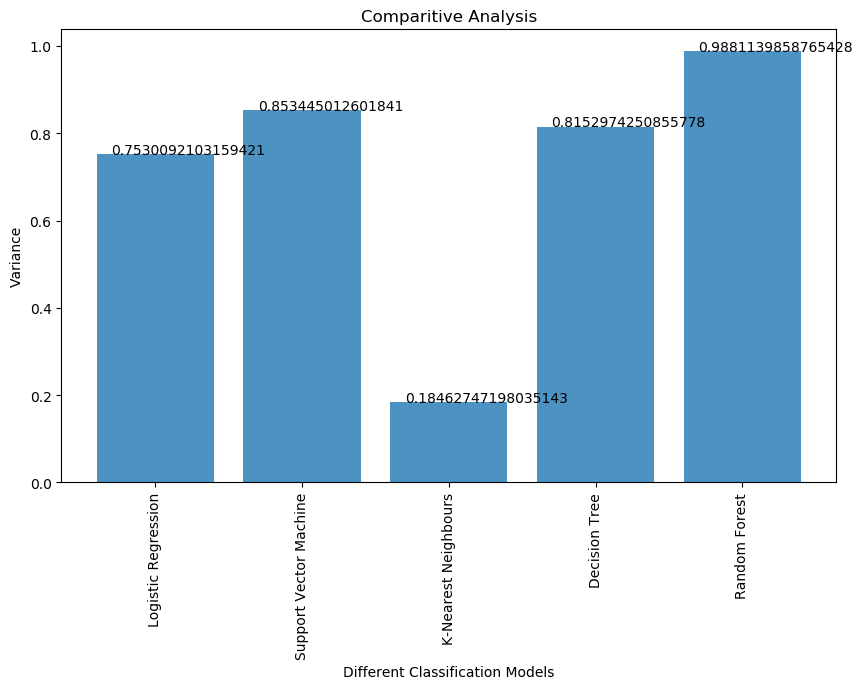

In [44]:
objects2 = ('Logistic Regression','Support Vector Machine', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forest')
x_pos2 = np.arange(len(objects2))
variance = [lr_var,svm_var,knn_var,dt_var,rf_var]
labels2=[lr_var,svm_var,knn_var,dt_var,rf_var]
plt.figure(figsize=(10,6),dpi=100)
plt.bar(x_pos2, variance, align='center', alpha=0.8)
plt.xticks(x_pos2, objects2)
plt.ylabel('Variance')
plt.xlabel('Different Classification Models')
plt.xticks(rotation=90)
plt.title('Comparitive Analysis')
for i in range (len(x_pos2)):
    plt.text(x= x_pos2[i]-0.3, y= variance[i]+0.0001, s=labels2[i], size=10)
plt.show()
